# Problem Statement

The value of a customer to a business over a long period of time is called the customer's lifetime value. In 2023, the insurance industry will face fierce competition, and a customer's decision-making process will take into account more than just their premium. CLV is a client driven measurement, and a strong base to expand upon to hold significant clients, increment income from less important clients, and further develop the client experience in general.

An auto insurance company wants to promote special deals for its devoted customers because it is having trouble keeping those customers. CLV is being considered as a criterion for classifying devoted clients.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('C:\\Users\\\jagal\\Downloads')

In [6]:
df=pd.read_csv('Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [8]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [11]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [12]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

# Summary Statistics of Numerical features

In [13]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


# Checking Null values

In [14]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

The data does not contain any null values.

# EDA

# Numerical Features

# CLV - Target variable analysis

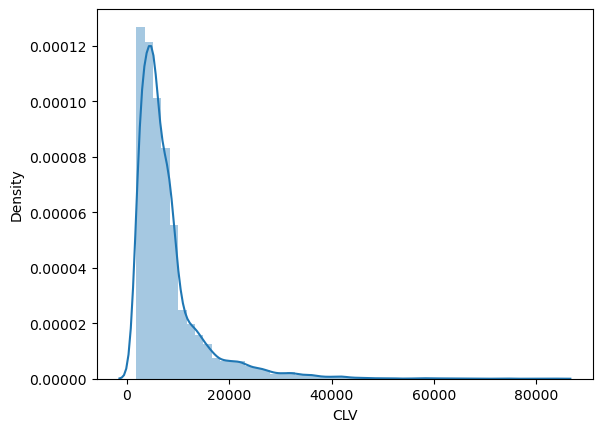

In [19]:
sns.distplot(df["CLV"])
plt.show()

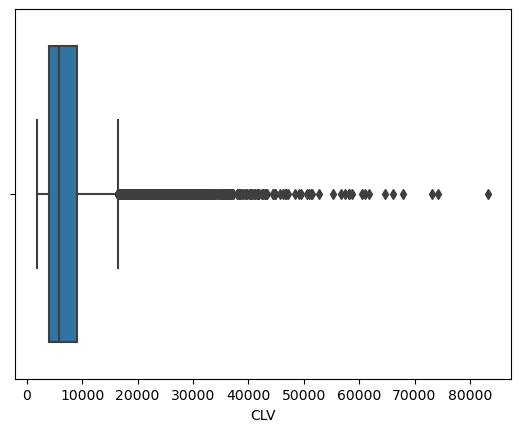

In [20]:
sns.boxplot(df["CLV"])
plt.show()

In [21]:
df["CLV"].skew()

3.0322802599299847

We can deduce from the distribution and box plot that CLV has a significant right skewedness. Our dependent variable contains numerous outliers, but because they are influential points, we are unable to treat them directly.

# Income

# Univariate Analysis

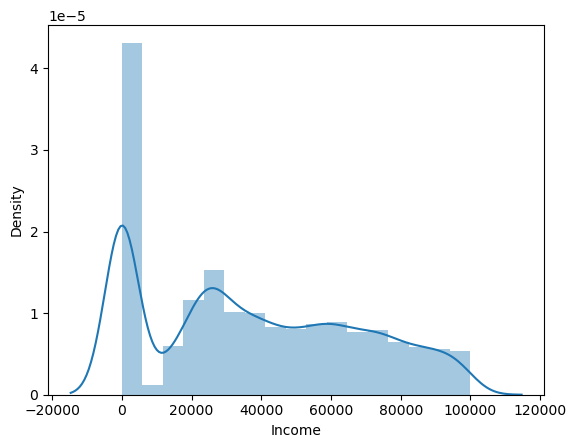

In [22]:
sns.distplot(df["Income"])
plt.show()

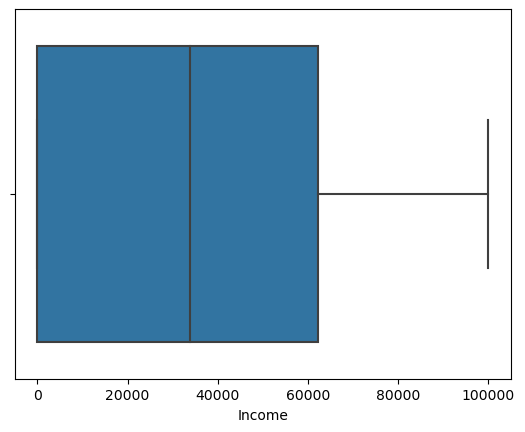

In [23]:
sns.boxplot(df["Income"])
plt.show()

# Bivariate Analysis

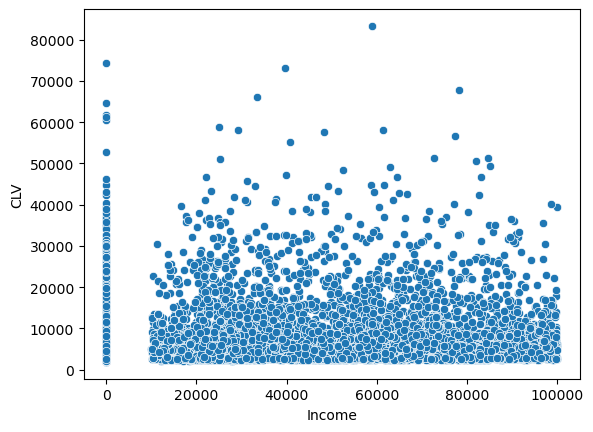

In [24]:
sns.scatterplot(df["Income"],df["CLV"])
plt.show()

The relationship between CLV and income is not linear.

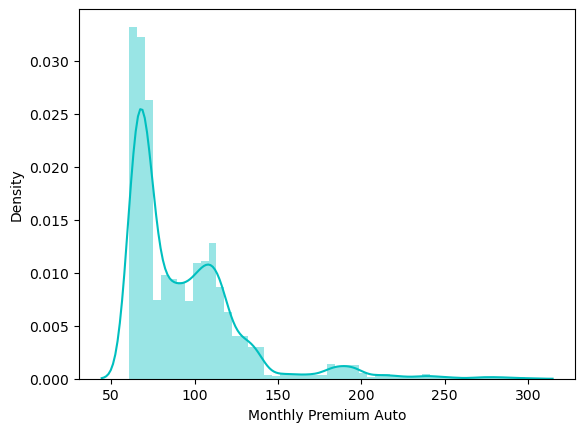

In [26]:
sns.distplot(df["Monthly Premium Auto"],color='c')
plt.show()

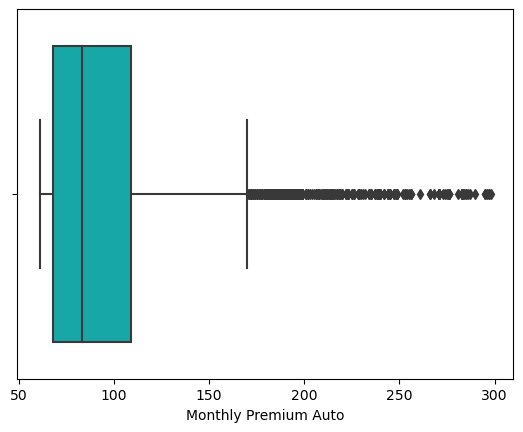

In [27]:
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.show()

# Bivariate Analysis

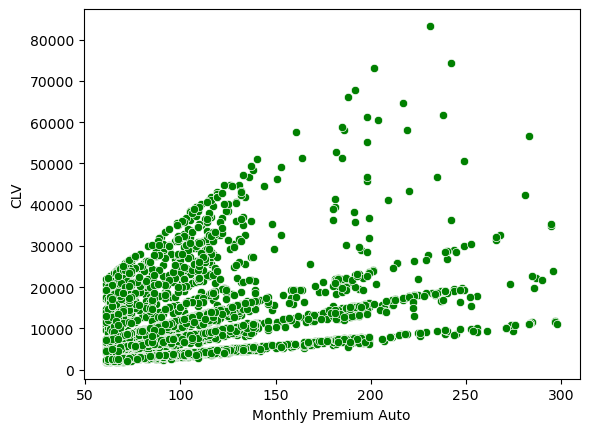

In [28]:
sns.scatterplot(df["Monthly Premium Auto"],df["CLV"],color='g')
plt.show()

The corraelation between CLV and income is linear.

# Months Since Last Claim

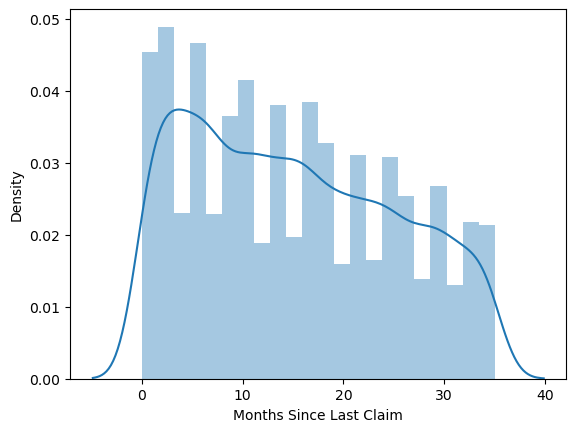

In [29]:
sns.distplot(df['Months Since Last Claim'])
plt.show()

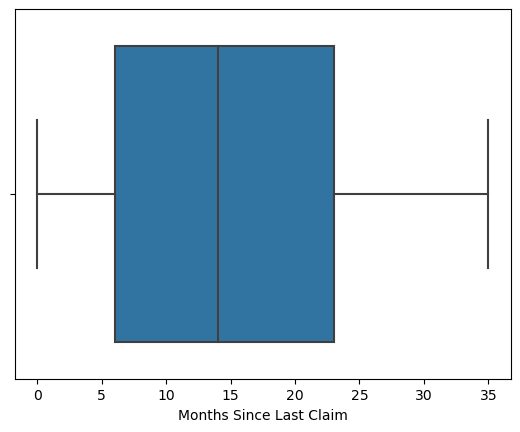

In [30]:
sns.boxplot(df["Months Since Last Claim"])
plt.show()

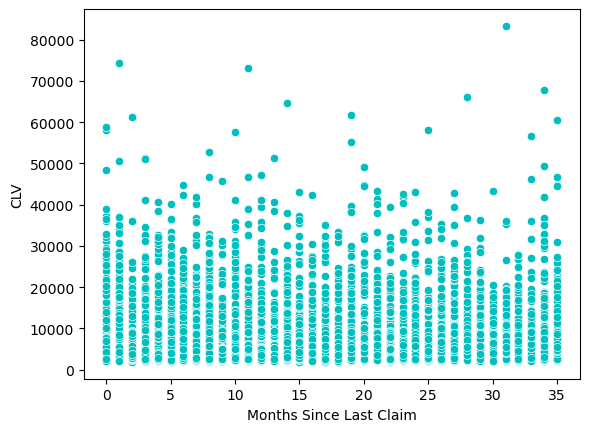

In [31]:
sns.scatterplot(df["Months Since Last Claim"],df["CLV"],color='c')
plt.show()

There is no linear relationship

# Months Since Policy Inception

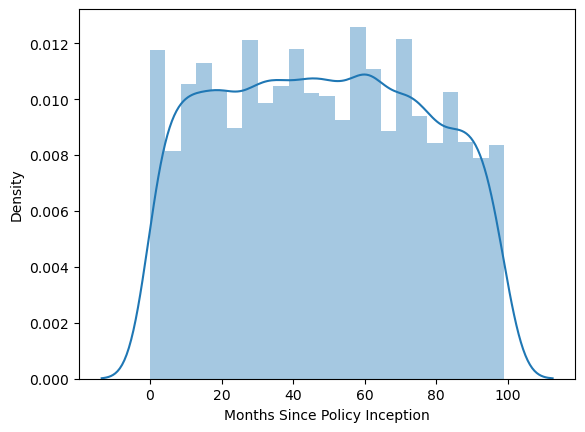

In [33]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

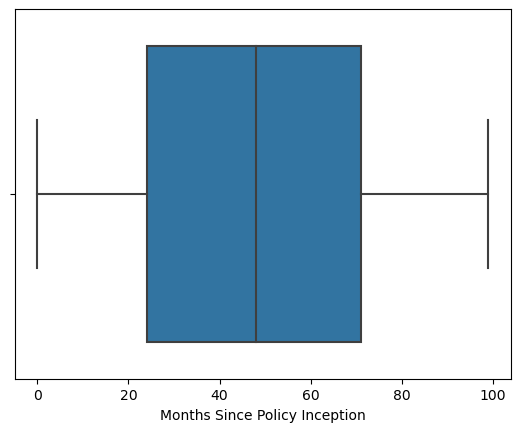

In [34]:
sns.boxplot(df["Months Since Policy Inception"])
plt.show()

# Total claim amount

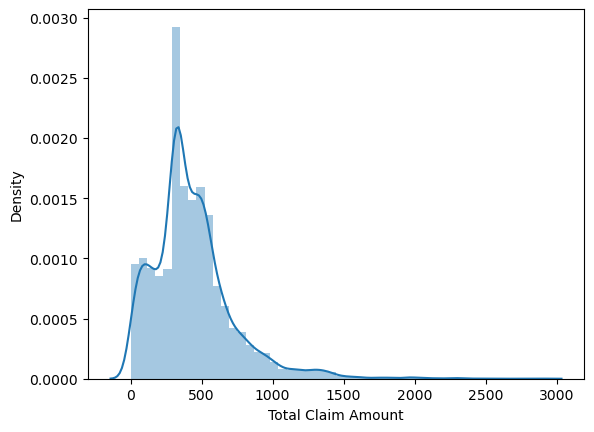

In [35]:
sns.distplot(df['Total Claim Amount'])
plt.show()

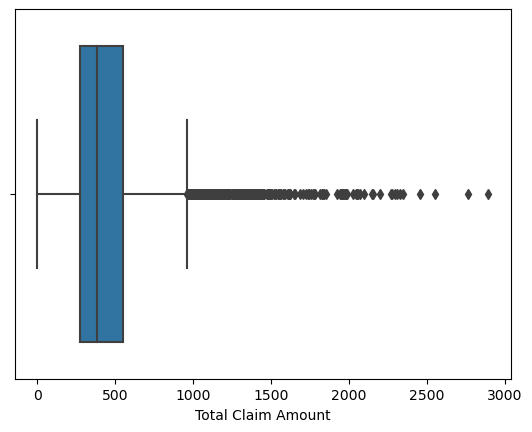

In [36]:
sns.boxplot(df["Total Claim Amount"])
plt.show()

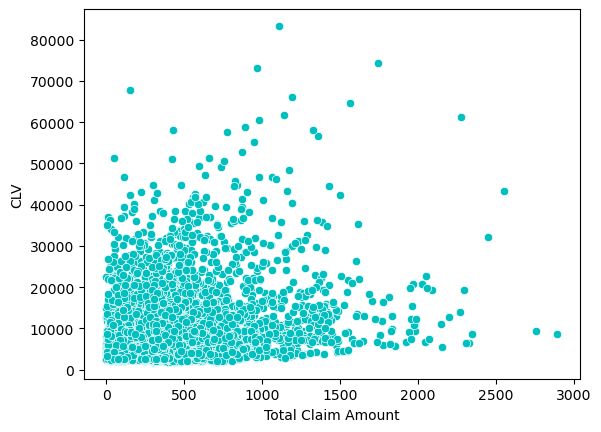

In [37]:
sns.scatterplot(df["Total Claim Amount"],df["CLV"],color='c')
plt.show()

The CLV and the Total Claim Amount are inversely correlated in a linear fashion.

We can use any power transformation (SQUARE or CUBE) to get rid of the multiple peaks in the monthly premium auto and income feature.

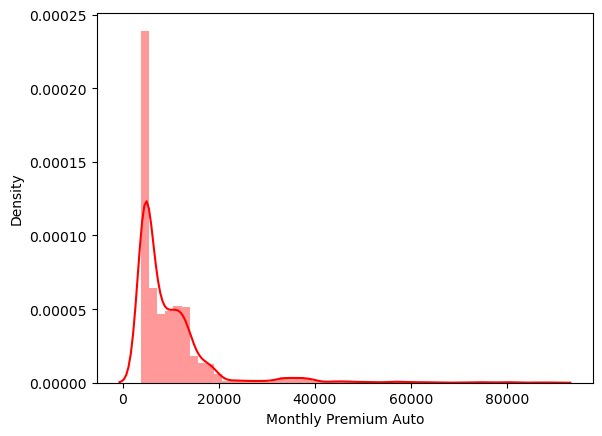

In [38]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')
plt.show()

# Categorical variables

In [41]:
cat_cols = df.select_dtypes(include="object")
no_col = df[["Number of Open Complaints","Number of Policies"]]
cat_cols = pd.concat([cat_cols,no_col],axis=1)


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [42]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [43]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

Because the Customer column, which is the id, has unique values for all records, it can't be used to build models because it doesn't matter.

# State

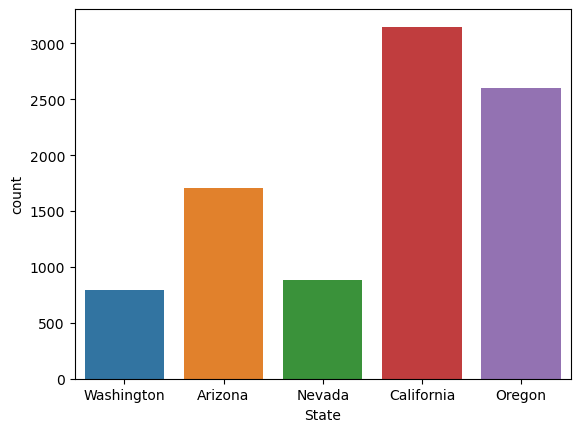

In [44]:
sns.countplot(df["State"])
plt.show()

The majority of people live in California.

# Response

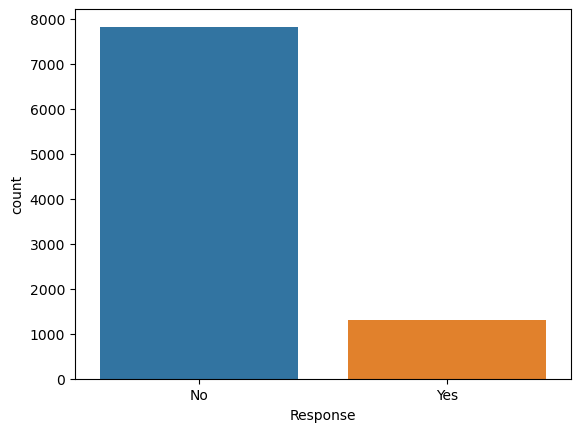

In [46]:
sns.countplot(df["Response"])
plt.show()

It would appear that fewer than 1400 clients have answered the marketing calls.

# Coverage

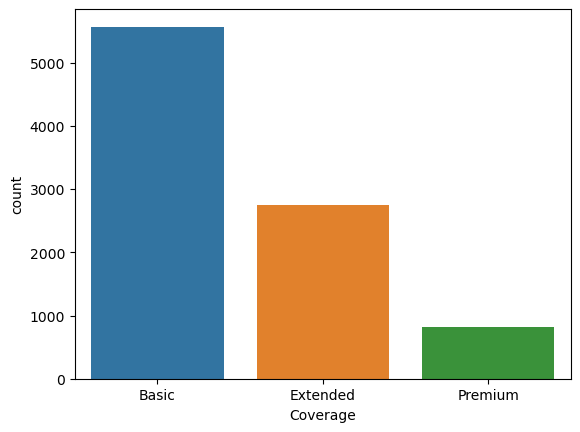

In [47]:
sns.countplot(df["Coverage"])
plt.show()

# Education

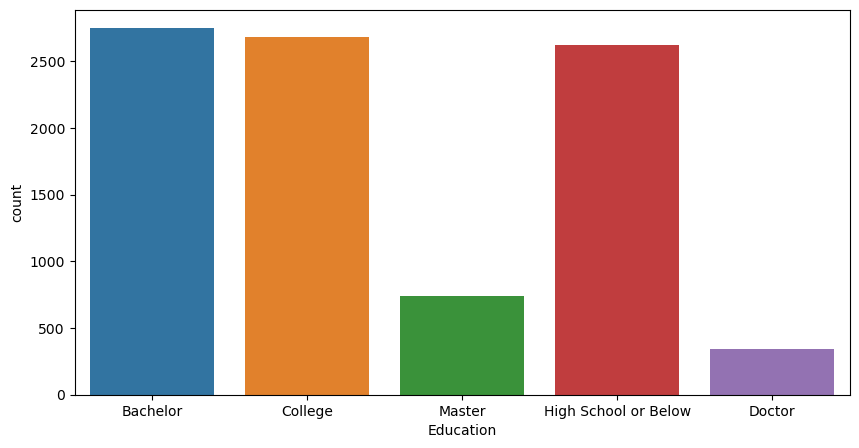

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(df["Education"])
plt.show()

The majority of customers hold bachelor's or college degrees.

# EmploymentStatus

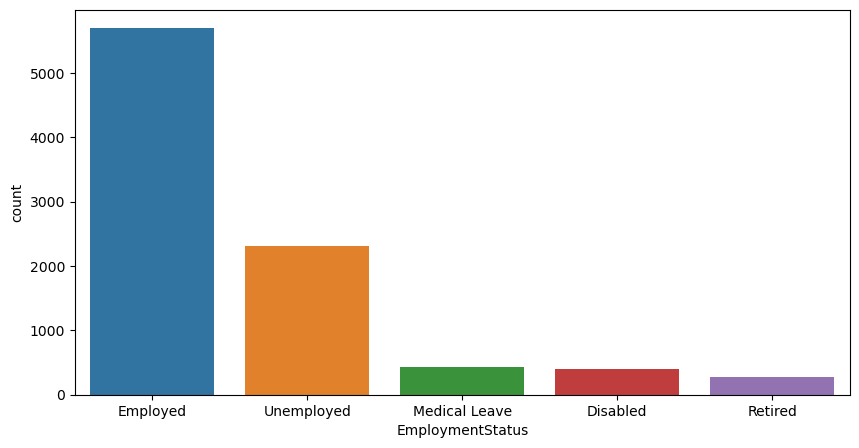

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(df["EmploymentStatus"])
plt.show()

In [50]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

About 62.38 percent of customers work.

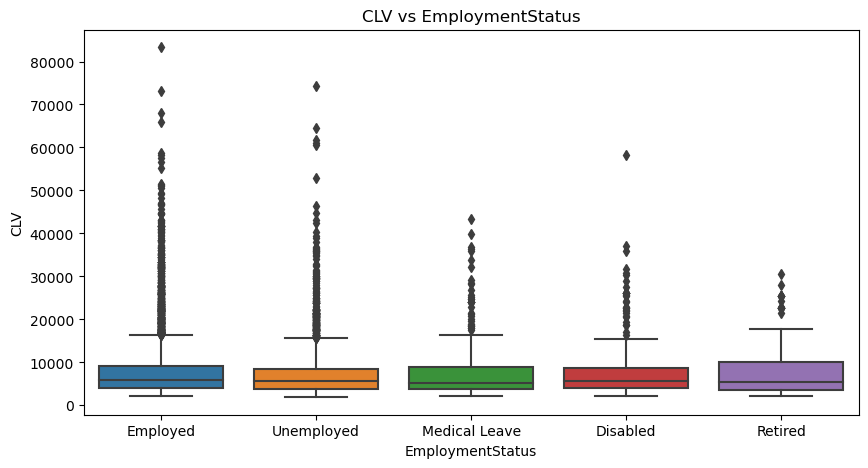

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
plt.show()

# Gender

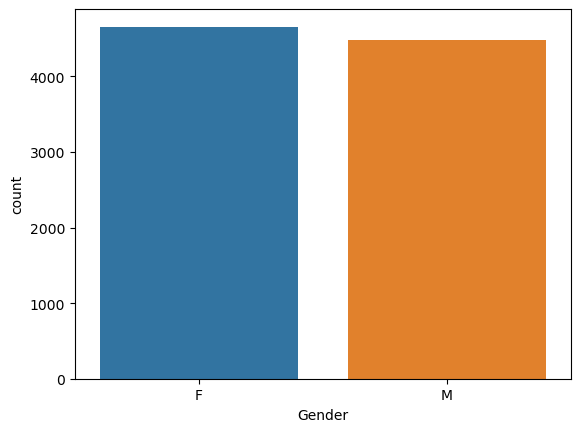

In [52]:
sns.countplot(df["Gender"])
plt.show()

# Location Code

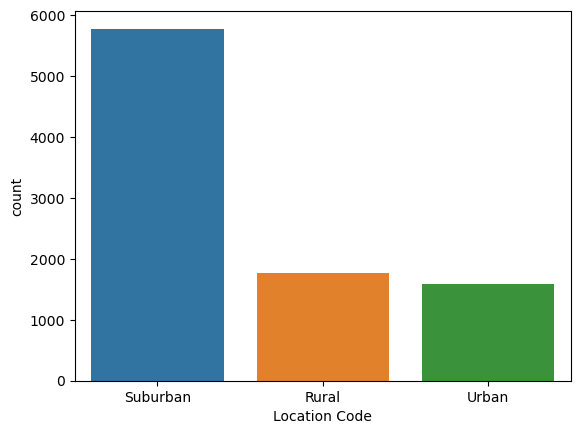

In [53]:
sns.countplot(df["Location Code"])
plt.show()

# Marital Status

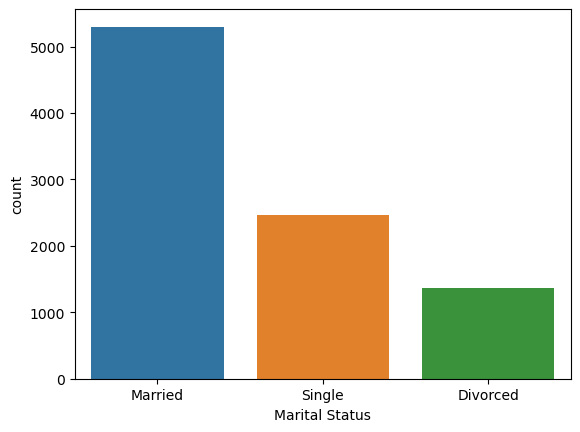

In [54]:
sns.countplot(df["Marital Status"])
plt.show()

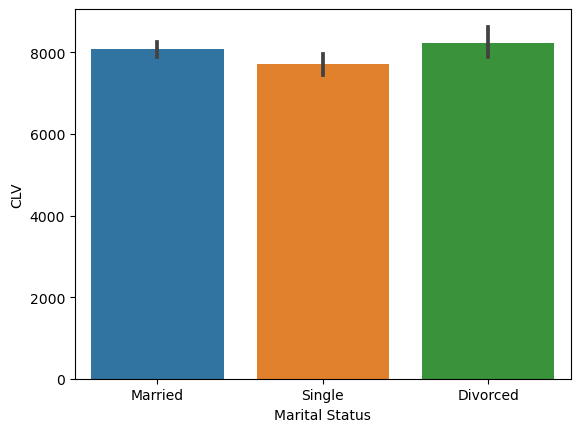

In [55]:

sns.barplot(df["Marital Status"],df["CLV"])
plt.show()

# Policy Type

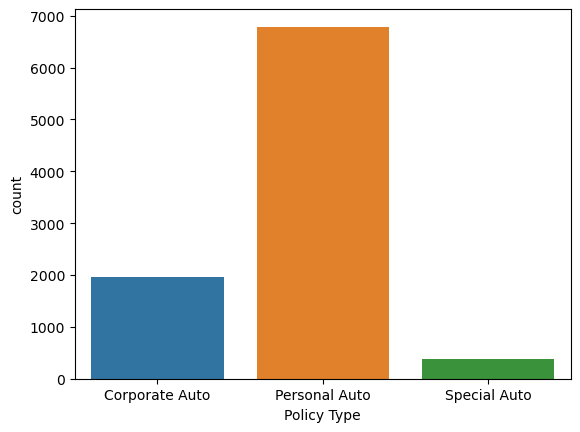

In [56]:
sns.countplot(df["Policy Type"])
plt.show()

# Policy

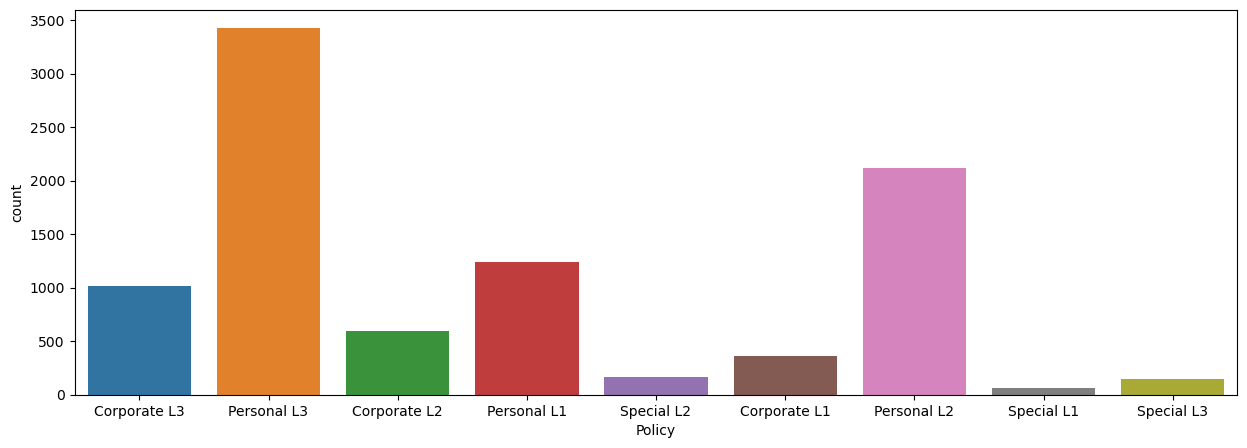

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(df["Policy"])
plt.show()

Customers in the Personal L3 policy subcategory are the most numerous.

# Renew Offer type

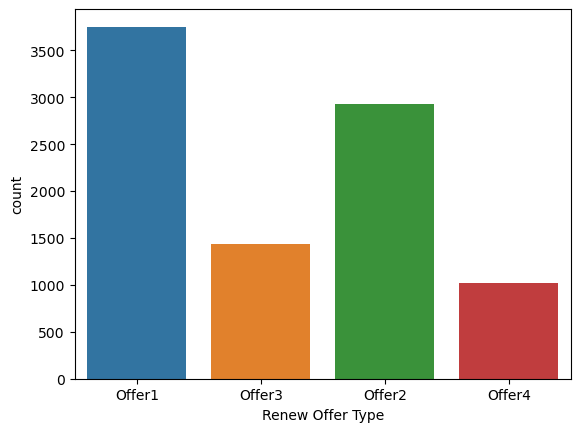

In [58]:
sns.countplot(df["Renew Offer Type"])
plt.show()

# Sales Channel

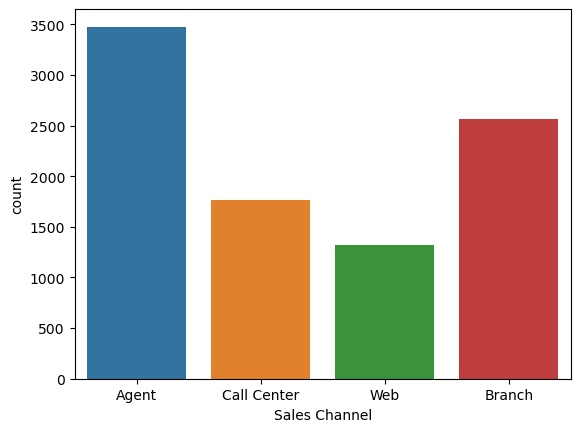

In [59]:
sns.countplot(df["Sales Channel"])
plt.show()

# Vehicle Class

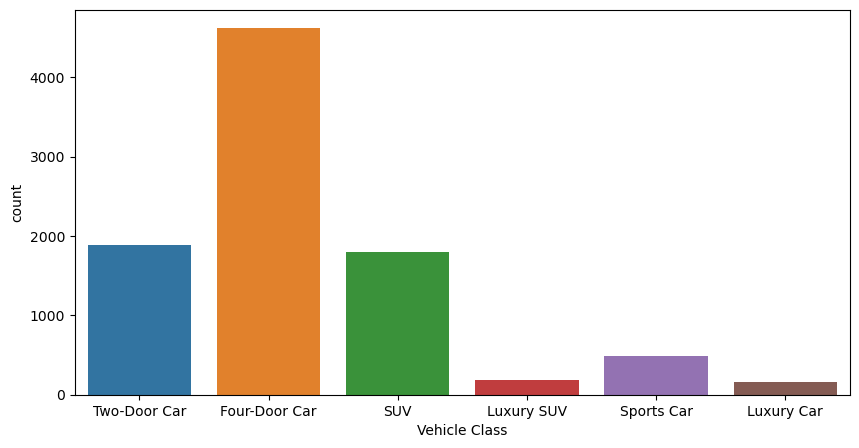

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Class"])
plt.show()

# Vehicle Size

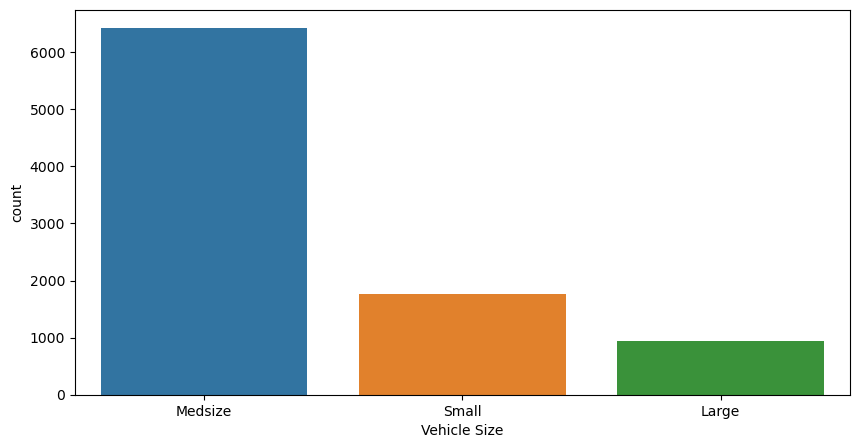

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Size"])
plt.show()

# Number of Open Complaints

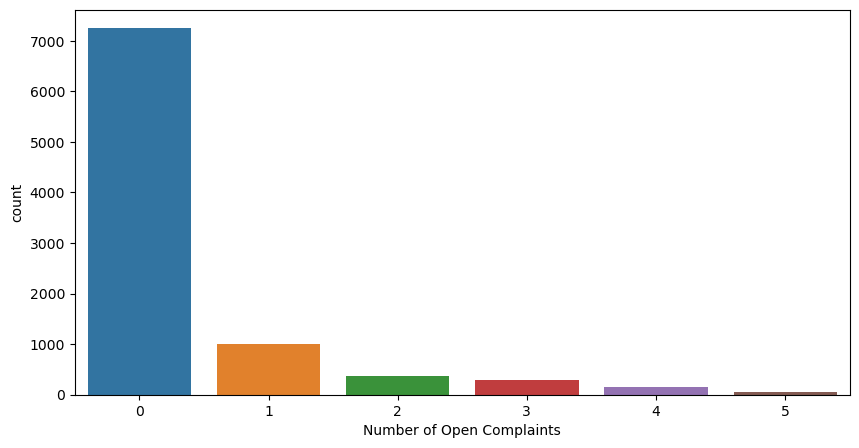

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Open Complaints"])
plt.show()

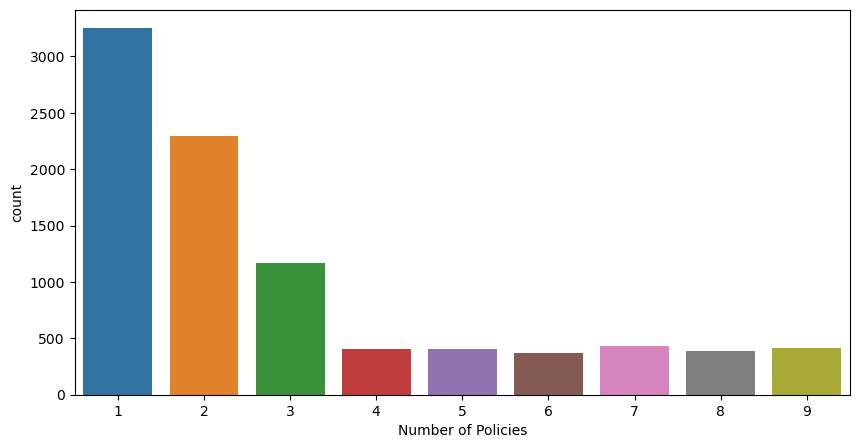

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Policies"])
plt.show()

In [64]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)
df["Months"] = df["Effective To Date"].dt.month
df['Months'] = df['Months'].astype('object')

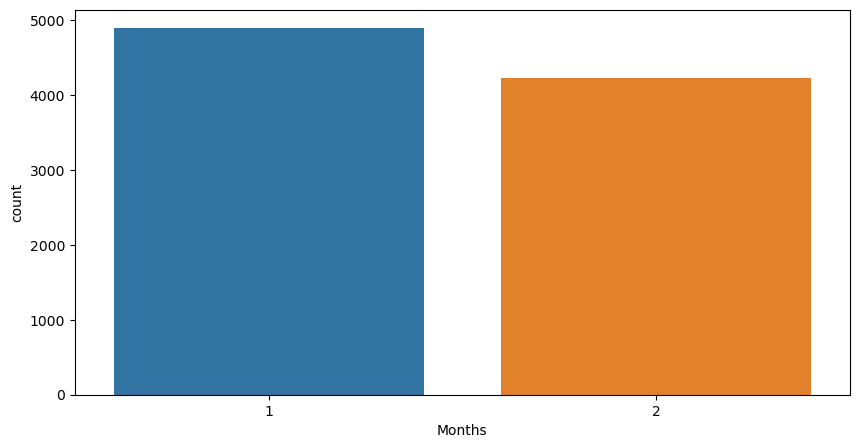

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(df["Months"])
plt.show()

In [66]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [67]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

# HeatMap

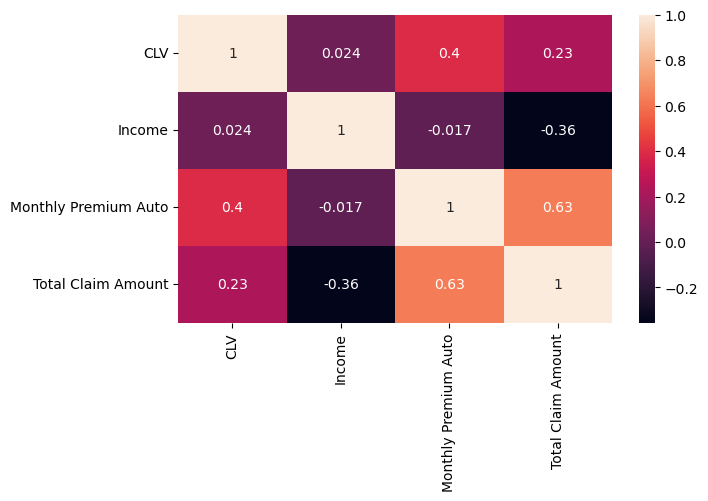

In [69]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

The heatmap clearly demonstrates that customer lifetime value has a satisfactory correlation with total claim amount and a better correlation with monthly premium auto.